# Setup

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats

# Preprocessing

## Raw data

In [2]:
# Load dataset
rawdata = pd.read_csv('product_sales.csv')
rawdata.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# Info about the dataset
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


There is missing data for the Revenue variable.

In [4]:
# Obtain descriptive statistics of numeric variables
rawdata.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


## Data validation

### Years as Customer

In [5]:
# Calculating maximum number of years to validate records in the dataset.
start_year = 1984
end_year = dt.datetime.today().year

yearsthreshold = end_year - start_year
yearsthreshold

print('Maximum number of years as a customer:', yearsthreshold)

Maximum number of years as a customer: 39


In [6]:
# Drop erroneous records in the dataset
df = rawdata.query('years_as_customer <= @yearsthreshold')
records_removed = len(rawdata) - len(df)    # records removed
pct_records_removed = records_removed / len(rawdata) * 100
print('Records removed:', records_removed, '\nPercentage of records removed', pct_records_removed)

Records removed: 2 
Percentage of records removed 0.013333333333333334


### Relation_length

In [7]:
# Recode years_as_customer as relation_length, which consists of 3 groups.
df = df.assign(relation_length =pd.cut(df['years_as_customer'], [-1, 2, 5, 40],
                                      labels = ['new', 'rising star', 'loyal']) )

### State

In [8]:
# Set State as category
df['state'] = df['state'].astype('category')

### Sales Method

In [9]:
# Replacing typos in the records
a = df.copy()

a['sales_method'] = a['sales_method'].str.lower()
a['sales_method'] = np.where(a['sales_method'] == 'em + call', 'email + call', a['sales_method'])

# Setting as category
a['sales_method'] = a['sales_method'].astype('category')
df = a.copy()

### Week

In [10]:
# Setting column as string
df['week'] = df['week'].astype('string')

### Customer ID

In [11]:
# Validating that the customer_id columns has unique values
df['customer_id'].str.len().value_counts()

36    14998
Name: customer_id, dtype: int64

### NB Sold

No issues.

### Revenue

No issues.

### NB Site Visits

No issues.

# Exploratory Data Analysis

## Tidy data

In [12]:
# First records in the tidy dataset
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,relation_length
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona,new
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,new
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,loyal
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana,rising star
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,new


In [13]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               14998 non-null  string  
 1   sales_method       14998 non-null  category
 2   customer_id        14998 non-null  object  
 3   nb_sold            14998 non-null  int64   
 4   revenue            13924 non-null  float64 
 5   years_as_customer  14998 non-null  int64   
 6   nb_site_visits     14998 non-null  int64   
 7   state              14998 non-null  category
 8   relation_length    14998 non-null  category
dtypes: category(3), float64(1), int64(3), object(1), string(1)
memory usage: 867.2+ KB


## Descriptive statistics

### Numeric variables

In [14]:
# Obtain descriptive statistics of numeric variables
df.describe()

,nb_sold,revenue,years_as_customer,nb_site_visits
count,14998.000000,13924.000000,14998.000000,14998.000000
mean,10.084678,93.937828,4.959261,24.990799
std,1.812334,47.437281,5.011237,3.501100
min,7.000000,32.540000,0.000000,12.000000
25%,9.000000,52.470000,1.000000,23.000000
50%,10.000000,89.500000,3.000000,25.000000
75%,11.000000,107.330000,7.000000,27.000000
max,16.000000,238.320000,39.000000,41.000000


### Non-numeric variables

In [15]:
# Obtain descriptive statistics of non-numeric variables
df.select_dtypes(exclude = 'number').describe()

,week,sales_method,customer_id,state,relation_length
count,14998,14998,14998,14998,14998
unique,6,3,14998,50,3
top,1,email,3d42901d-a17a-45e8-a98c-3d39c54a8ca0,California,new
freq,3721,7465,1,1870,5962


## Questions

### How many customers were there for each approach?

The Email method was used in 7,465 (50%) customers, Call in 4,961 (33%), and Email + Call in 2,572 (17%).

In [16]:
# Create table with count of sales_method and percentage of total
n = df['sales_method'].value_counts().rename('count')
p = df['sales_method'].value_counts(normalize = True).rename('pct')

pd.concat([n, p * 100], axis = 1)

,count,pct
email,7465,49.773303
call,4961,33.077744
email + call,2572,17.148953


Text(0.5, 1.0, 'Count of Customers per Sales Method')

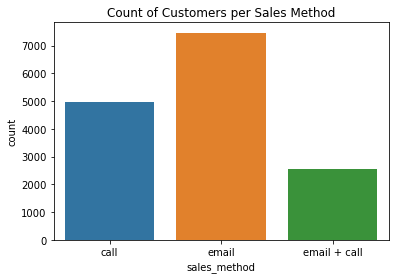

In [17]:
# Create column chart
sns.countplot(data = df, x = 'sales_method').set_title('Count of Customers per Sales Method')

### What does the spread of the revenue look like overall? And for each method?

#### Revenue overall

In [18]:
# Show descriptive statistics for Revenue
df['revenue'].describe()

count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64

The variable Revenue shows a right-tailed distribution with an average of 94 and a median of 90. Half of the customers have produced each a revenue between 52 and 107 on average. Some unusual customers have produced revenues which exceeded the 200 mark. 

Text(0.5, 1.0, 'Histogram of Revenue')

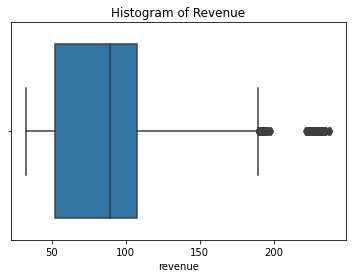

In [19]:
# Create boxplot for Revenue
sns.boxplot(data = df, x = 'revenue').set_title('Histogram of Revenue')

Text(0.5, 1.0, 'Histogram of Revenue')

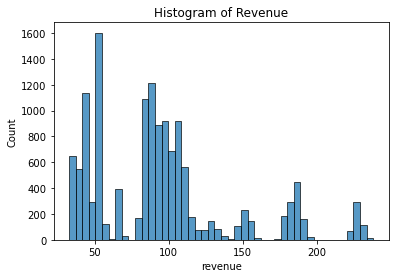

In [20]:
# Create Histogram for Revenue
sns.histplot(data = df, x = 'revenue').set_title('Histogram of Revenue')

#### Revenue by method

The variable Revenue broken down by method reveals evident differences in their mean and median. Revenue for Call and revenue for Email show a right-tailed distribution, while revenue by Email + Call does not.

The data suggests that the Email + call method produces much higher Revenue than Email and Call, in that order.

In [21]:
# Obtain descriptive statistics for Revenue by Sales Method.
df.groupby('sales_method')['revenue'].describe().transpose()

sales_method,call,email,email + call
count,4780.000000,6921.000000,2223.000000
mean,47.596866,97.127671,183.651233
std,8.610699,11.211279,29.083924
min,32.540000,78.830000,122.110000
25%,41.470000,87.880000,155.775000
50%,49.050000,95.580000,184.740000
75%,52.680000,105.170000,191.110000
max,71.360000,148.970000,238.320000


Text(0.5, 1.0, 'Boxplot of Revenue by Sales Method')

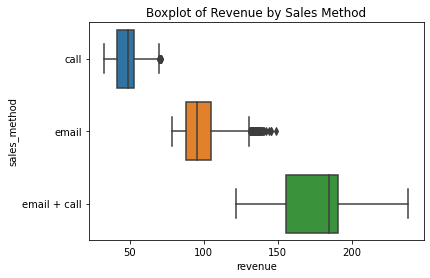

In [22]:
# Create boxplot of Revenue by Sales Method.
sns.boxplot(data = df, x = 'revenue', y = 'sales_method').set_title('Boxplot of Revenue by Sales Method')

Text(0.5, 1.0, 'Histogram of Revenue by Sales Method')

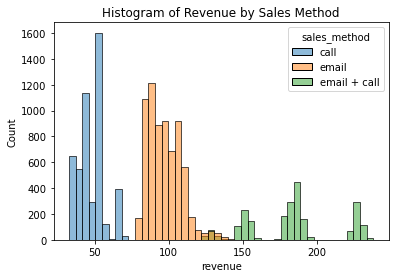

In [23]:
# Create histogram of Revenue by Sales Method
sns.histplot(data = df, x = 'revenue', hue = 'sales_method').set_title('Histogram of Revenue by Sales Method')

In [24]:
# Subset sample to apply in ANOVA test
x = df.dropna().query('sales_method == "call"')['revenue']
y = df.dropna().query('sales_method == "email"')['revenue']
z = df.dropna().query('sales_method == "email + call"')['revenue']

In [25]:
# ANOVA test for relation_length and revenue
stats.f_oneway(x, y, z)

F_onewayResult(statistic=63304.388755537744, pvalue=0.0)

The ANOVA test above clearly shows that there is evidence to assume that the Sales Method has an impact on revenue with a 95% of confidence.

### Was there any difference in revenue over time for each of the methods?

All of the methods have produced positive effects on revenues over time. Email + Call has produced the best results across time, followed by Email, and Call. However it is particularly noticeable that the positive effect of all methods every second week as shown in the chart (week 3 and 5).

In [26]:
# Obtain average revenue by Sales Method and Week.
x = (df
       .groupby(['sales_method', 'week'], as_index = False)
       ['revenue'].agg({'revenue_mean': 'mean', 'count': 'count'}) )

# Add colum diff and pct_change.
x = x.assign(diff = x.groupby('sales_method')['revenue_mean'].diff(),
             pct_change = x.groupby('sales_method')['revenue_mean'].pct_change() * 100)

x.head()

,sales_method,week,revenue_mean,count,diff,pct_change
0,call,1,35.350243,740,NaN,NaN
1,call,2,43.602606,775,8.252363,23.344573
2,call,3,41.759528,868,-1.843079,-4.226992
3,call,4,51.447061,963,9.687534,23.198379
4,call,5,53.146087,1007,1.699026,3.302475


Text(0.5, 1.0, 'Weekly Revenues per Method')

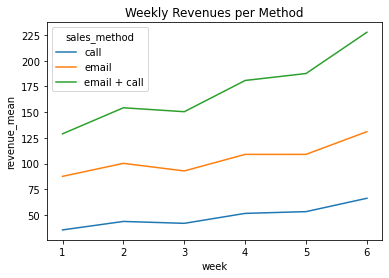

In [27]:
# Create lineplot of Weekly Revenues per Method.
sns.lineplot(data = x, x = 'week', y = 'revenue_mean', hue = 'sales_method').set_title('Weekly Revenues per Method')

Text(0.5, 1.0, 'Weekly Difference in Revenues per Method')

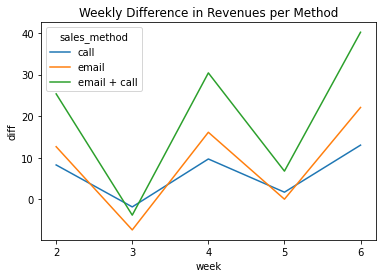

In [28]:
# Create lineplot of Weekly Difference per Method.
(sns.lineplot(data = x, x = 'week', y = 'diff', hue = 'sales_method')
    .set_title('Weekly Difference in Revenues per Method') )

Text(0.5, 1.0, 'Weekly Percentage Change in Revenues per Method')

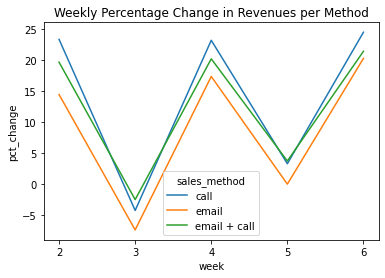

In [29]:
# Create lineplot of weekly Percentage Change per Method.
(sns.lineplot(data = x, x = 'week', y = 'pct_change', hue = 'sales_method')
    .set_title('Weekly Percentage Change in Revenues per Method') )

### Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

Following the reasoning stated in the last answer, it is recommended that the company applies strategy that involves alternating every week between: 

- Email + Call on the weeks that maximum impact on Revenue is observed.
- Email on the other weeks as the implementation cost is negligible but can still produce some positive return.  

### Diferences between the customers in each group

Additional information about customers can be described in terms of their state their years as customer.


The customers were classified according to their years as customers as 'new' (up to 2 years), 'rising star' (between 2 and 5), and 'loyal' (above 5). This new classification has been named Relation Length. With a confidence level of 95%, data reveals that Relation Length has an impact on Revenue. In particular, new customers produce a higher revenue than loyal customers.

,mean,count
relation_length,,
new,96.999833,5525
rising star,94.369168,3774
loyal,89.928000,4625


Text(0.5, 1.0, 'Average Revenue by Relation Length')

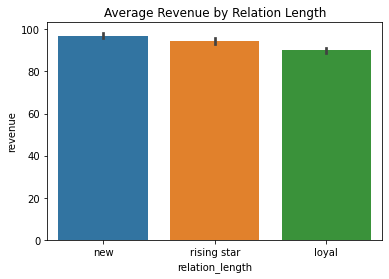

In [30]:
# Aggregate Revenue as mean and count by Relation Length
display(a.groupby('relation_length')['revenue'].agg(['mean', 'count']) )
display(sns.barplot(data = a, x = 'relation_length', y = 'revenue').set_title('Average Revenue by Relation Length'))

In [31]:
# Subset sample to apply in ANOVA test
x = df.dropna().query('relation_length == "new"')['revenue']
y = df.dropna().query('relation_length == "loyal"')['revenue']
z = df.dropna().query('relation_length == "rising star"')['revenue']

In [32]:
# ANOVA test for relation_length and revenue
stats.f_oneway(x, y, z)

F_onewayResult(statistic=28.299724602809587, pvalue=5.426292355225706e-13)

The ANOVA test above clearly shows that there is evidence to indicate that the Relation Length has an impact on revenue with a 95% of confidence. 

In [33]:
# T-test for difference of means between new customers and loyal
stats.ttest_ind(x, z)

Ttest_indResult(statistic=2.5673725219515866, pvalue=0.010262740437275744)

The T-test above clearly shows that there is evidence to indicate that the Revenue produced by new customers is higher than the one produced by Loyal customers with a 95% of confidence. 

## Business metric

There are two key metrics to track:

1. Weekly Revenue by Sales Method: It is essential to notice any deviation from the trend observed in the first six weeks in order to adapt the sales method strategy accordingly.
2. Revenue by Relation Length: With the data available, there is evidence to suggest that new customers produce more revenue than loyal (older) customers.

# Conclusions and Recommendations

The Email method was used in 7,465 (50%) customers, Call in 4,961 (33%), and Email + Call in 2,572 (17%).

The evidence suggests that Sales Method has impact on Revenue (95% of confidence). In particular, the Email + call method produces much higher Revenue than Email and Call, in that order. Such a relation persists over time.

The effects of all the methods used on Revenue alternate between very high on one week and dramatically low on the other. For this reason it is recommended that the company applies a sales method strategy that involves alternating every week between: 

- Employing Email + Call publicity on the weeks that maximum impact on Revenue is observed (e.g. weeks 2, 4, 6, etc.)
- Employing only Email publicity on the other weeks (e.g. weeks 1, 3, 5, etc.) as the implementation cost is negligible but can still produce some positive Revenue.  

The length of the customers relation (Relation Length) also has an impact on Revenue (95% of confidence). In particular, new customers (2 years or less) produce a higher revenue than loyal customers (5 years or above). Hence, the recommendation is to prioritize publicity resources to address new customers instead of older ones if the budget is limited.